<a href="https://colab.research.google.com/github/Shanaya17/AI-ML-Month/blob/main/Shanaya_Aggarwal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERSTORE**

#Installing kaggle, other libraries and importing necessary files


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! unzip archive


Archive:  archive.zip
  inflating: superstore_dataset2011-2015.csv  


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

UTF encoding was different so have to specify it's encoding while opening the file


In [ ]:
import chardet
with open('superstore_dataset2011-2015.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:

data = pd.read_csv('superstore_dataset2011-2015.csv', encoding='ISO-8859-1')

#Data Cleaning


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(51290, 24)

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [ ]:
data.tail(n=5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium



rename some column names that do not conform to the Python naming conventions and use the underline naming method uniformly.

In [ ]:
data.rename(columns=lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [ ]:
data.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

check duplicate values and outliers


In [ ]:
data.describe()


,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
data.duplicated().sum()

0

#Q1) BOX PLOT ALL NUMERICAL VARIABLES AND CHECK FOR OUTLIERS

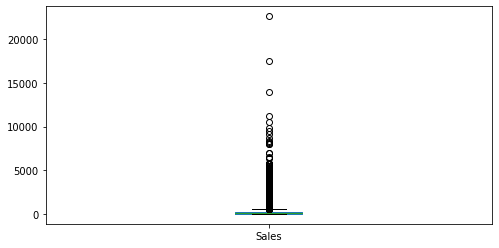

In [ ]:
#Box plot for sales 
plt.figure(figsize=(8,4))
data.boxplot(column =['Sales'], grid = False)


**RESULT : Outliers exist in the sales data, Around 10,000 to more than 20,000**

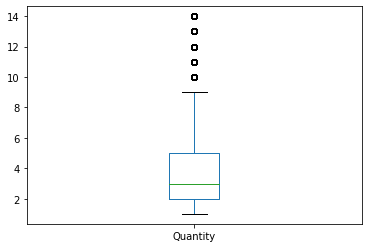

In [ ]:
#Box plot for Quantity
data.boxplot(column =['Quantity'], grid = False)


**RESULT : Outliers exist, quantity of 5 objects was a lot more as compared to the general trend in quantities, around 10 to 14**

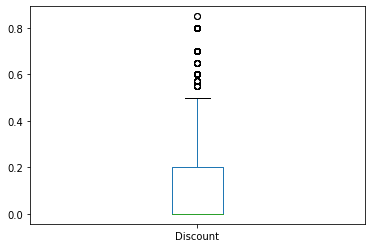

In [ ]:
#Box plot for discount
data.boxplot(column =['Discount'], grid = False)

**RESULT : Outliers exist, discounts of 7 objects was a lot more as compared to the general trend in discounts, arounf 0.5 to 0.8**

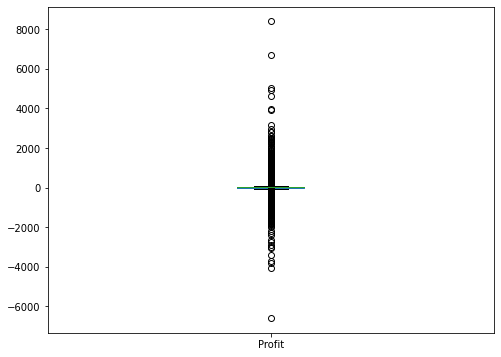

In [ ]:
#Box Plot for profit 
plt.figure(figsize=(8,6))
data.boxplot(column =['Profit'], grid = False)

**RESULT : There is no regular trend in Profits. There are a lot of outliers in both directions thus the net effect turns out to be very less.**

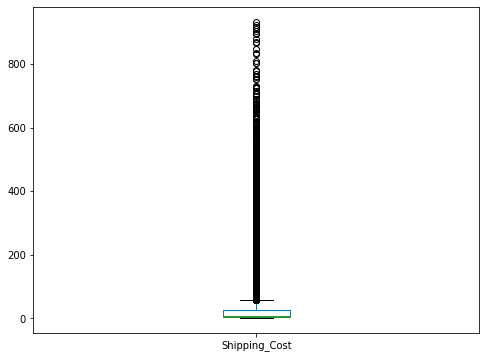

In [ ]:
#Box plot for shipping costs
plt.figure(figsize=(8,6))
data.boxplot(column =['Shipping_Cost'], grid = False)

**RESULT :Generally, most shipping costs are very high. A lot of values are outliers.**

#Q2) PLOT PAIRPLOT FOR REGION WISE DATA DISTRIBUTION OF PARAMETERS : SALES, POSTAL CODE, DISCOUNT, PROFIT, QUANTITY.

<Figure size 432x288 with 0 Axes>

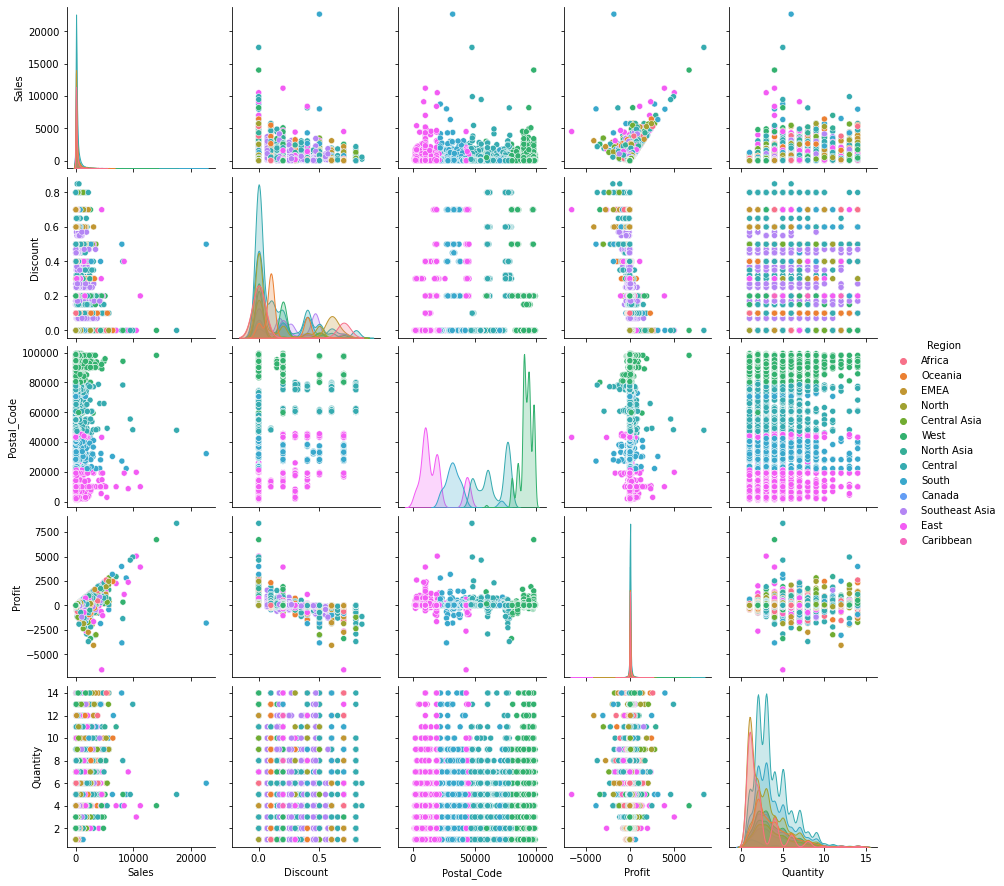

In [ ]:
#pairplot
plt.figure()
sns.pairplot(data, vars=['Sales', 'Discount','Postal_Code', 'Profit','Quantity'], hue = "Region")
plt.show()

#Q3) IS THERE ANY IMPACT ON SALES THROUGH SHIP MODE?


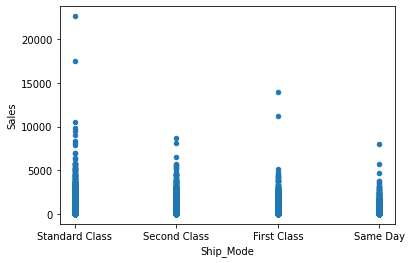

In [ ]:
#Scatter plot to check relationship between Sales and Ship Mode
data.plot.scatter(x = 'Ship_Mode', y = 'Sales')

**RESULT : Yes, sales are impacted through shipping mode. Most objects with high sales have undergone Standard Class Shipping. While objects with medium sales either undergone Second Class Shipping or Same Day Shipping.**

**Sales for Standard Class is the most, followed by First Class, Second Class and Same Day respectively. Standard class ship mode has the maximum sales and First class and Same day ship mode has comparatively less sales.**

#Q4) FIND SEGMENT WISE SALES AND IT'S IMPACT. PLOT BAR PLOT TO SEE WHICH SEGMENT HAS HIGHEST SALES AND PROFIT.

In [ ]:
#Calculating Segment Wise Sales
data.groupby('Segment').sum()['Sales'] 

Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64

**RESULT : Consumer Segment a sales of 6.507949e+06. Corporate Segment has a sales of 3.824698e+06. Home Office Segment has a sales of 2.309855e+06.**

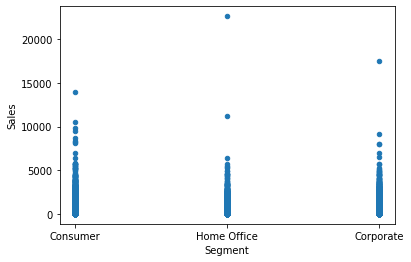

In [ ]:
#Scatter Plot to check relationship between Sales and Segment
data.plot.scatter(x = 'Segment', y = 'Sales')

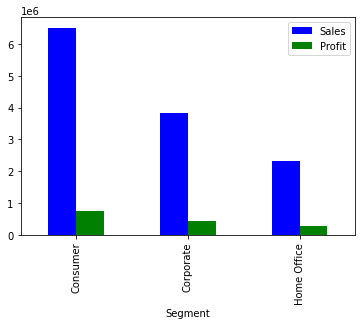

In [ ]:
segmentwise = data.groupby("Segment")[["Sales","Profit"]].sum()
segmentwise.plot.bar(color =["blue","green"])

In [ ]:
segmentwise[segmentwise["Sales"] == segmentwise["Sales"].max()]

,Sales,Profit
Segment,,
Consumer,6.507949e+06,749239.78206


In [ ]:
segmentwise[segmentwise["Profit"] == segmentwise["Profit"].max()]

,Sales,Profit
Segment,,
Consumer,6.507949e+06,749239.78206


**RESULT : Consumer segment has the highest profits and sales**

#Q5) CREATE BAR PLOT FOR SUB CATEGORY WISE ORDER COUNTS. WHICH SUBCATEGORY HAS MAX ORDER AND MIN ORDER?

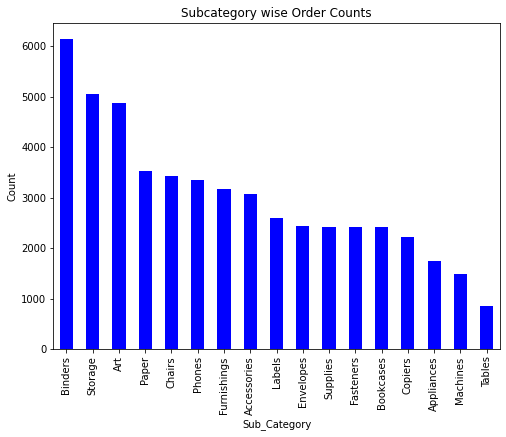

In [ ]:

#Bar chart for subcategory wise order counts
plt.figure(figsize=(8,6))
subcategorywiseorders = data.groupby('Sub_Category')['Row_ID'].count().sort_values(ascending=False)
subcategorywiseorders.plot(kind='bar', color='blue')
plt.ylabel('Count')
plt.xlabel('Sub_Category')
plt.title('Subcategory wise Order Counts')
plt.show()

In [ ]:
#Sort by descending order according to Count
subcat_analysis = pd.DataFrame(data.groupby(['Sub_Category'])[['Quantity']].sum())
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Quantity', ascending = False))
subcat_sales

,Quantity
Sub_Category,
Binders,21429
Storage,16917
Art,16301
Paper,12822
Chairs,12336
Phones,11870
Furnishings,11225
Accessories,10946
Labels,9322


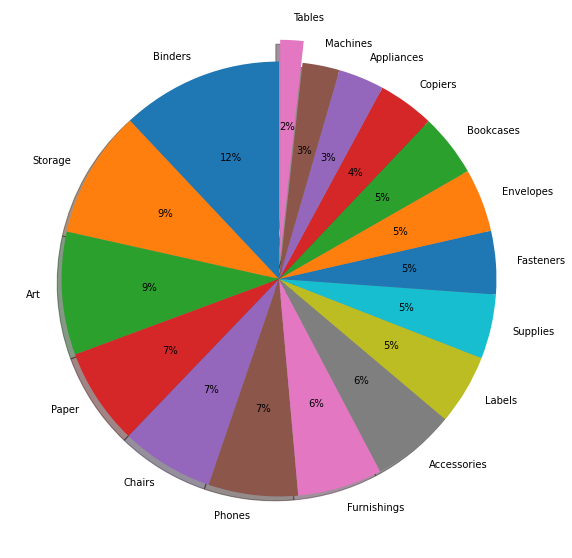

In [ ]:
# Pie Chart to show minimum order counts
plt.figure(figsize=(10,10))
explode = [0, 0, 0, 0, 0, 0,0, 0, 0,0, 0, 0,0, 0, 0,0, 0.1]
subcat_analysis = pd.DataFrame(data.groupby(['Sub_Category'])['Quantity'].sum().reset_index())
subcat_analysis = pd.DataFrame(subcat_analysis.sort_values('Quantity', ascending = False))


plt.pie(subcat_analysis.Quantity, labels = subcat_analysis.Sub_Category, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)


plt.show()

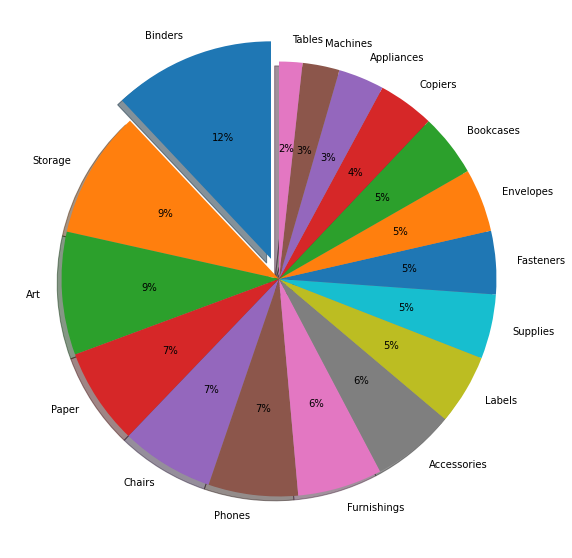

In [ ]:
# Pie Chart to show maximum order counts
plt.figure(figsize=(10,10))
explode = [0.1, 0, 0, 0, 0, 0,0, 0, 0,0, 0, 0,0, 0, 0,0, 0]
subcat_analysis = pd.DataFrame(data.groupby(['Sub_Category'])['Quantity'].sum().reset_index())
subcat_analysis = pd.DataFrame(subcat_analysis.sort_values('Quantity', ascending = False))


plt.pie(subcat_analysis.Quantity, labels = subcat_analysis.Sub_Category, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)


plt.show()

**RESULT : Binders have the most orders. Tables have the least order counts.**

#Q6) ANALYSE CITY WISE PERFORMANCE OF ORDER COUNTS

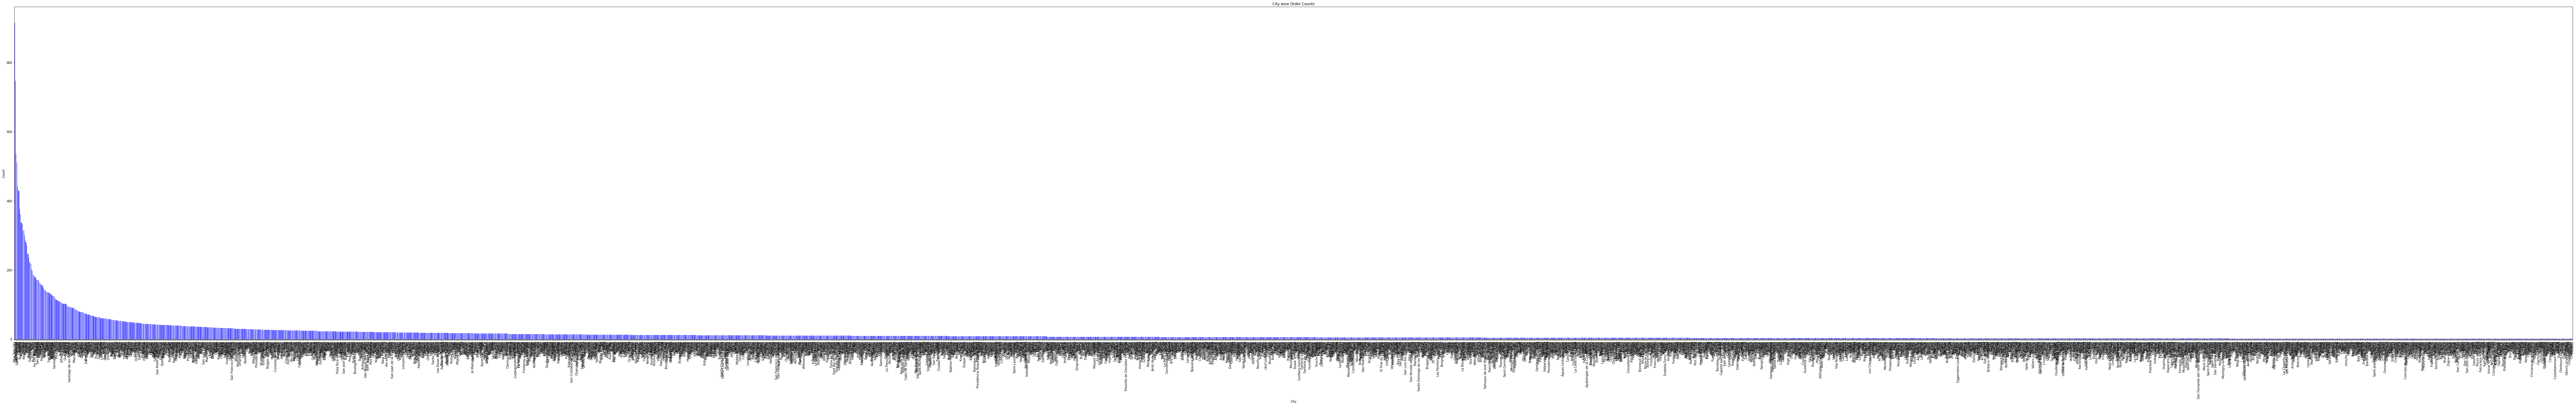

In [ ]:
#Bar plot between city and order counts
plt.figure(figsize=(150,20))
subcategorywiseorders = data.groupby('City')['Row_ID'].count().sort_values(ascending=False)
subcategorywiseorders.plot(kind='bar', color='blue')
plt.ylabel('Count')
plt.xlabel('City')
plt.title('City wise Order Counts')
plt.show()


In [ ]:
city_sales = pd.DataFrame(data.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending=False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256368.16100,3417
Los Angeles,175851.34100,2879
Manila,120886.94850,1661
Seattle,119540.74200,1590
San Francisco,112669.09200,1935
Philadelphia,109077.01300,1981
Sydney,101945.51700,975
Jakarta,94321.32420,1226
London,86945.80500,1033


In [ ]:
bottom10 = city_sales[-10:]
bottom10


,Sales,Quantity
City,,
Springdale,4.300,2
San Luis Obispo,3.620,2
Fort Portal,3.573,1
Victoria Falls,3.465,1
Felahiye,2.808,1
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


**RESULT : New York City has the highest order counts**

#Q7) ANALYSE STATE WISE PERFORMANCE OF ORDER COUNTS

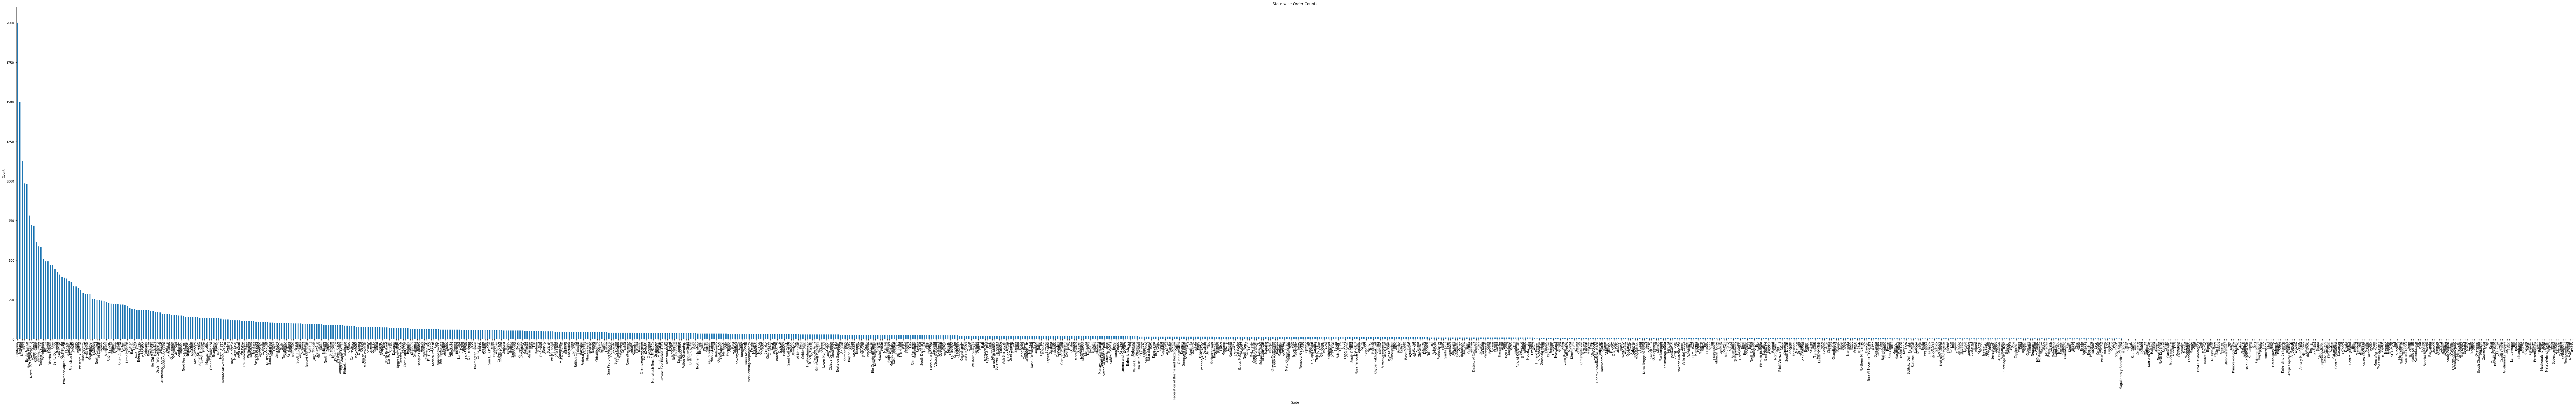

In [ ]:
plt.figure(figsize=(150,20))
subcategorywiseorders = data.groupby('State')['Row_ID'].count().sort_values(ascending=False)
subcategorywiseorders.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('State')
plt.title('State wise Order Counts')
plt.show()

In [ ]:
state_sales = pd.DataFrame(data.groupby(['State'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending=False))
top10 = state_sales[:10]
top10

,Sales,Quantity
State,,
England,485170.9710,5656
California,457687.6315,7667
Ile-de-France,317822.5440,3839
New York,310876.2710,4224
New South Wales,270487.1040,2921
Queensland,238312.7340,2665
North Rhine-Westphalia,216451.8510,2660
Texas,170188.0458,3724
San Salvador,153639.3970,2273


In [ ]:
bottom10 = state_sales[-10:]
bottom10

,Sales,Quantity
State,,
Inhambane,23.250,1
Gangwon,22.410,1
Zhambyl,22.050,3
Rize,18.528,1
Edirne,18.528,1
Pernik,14.820,1
Manicaland,11.853,2
Bitola,10.980,1
Kabarole,3.573,1


**RESULT : California has the highest order counts.**


#Q8) ANALYSE CATEGORY WISE SALES PERFORMANCE AND SUBCATEGORY WISE PROFIT PERFORMANCE. WHICH SHIPMENT CLASS BOOSTS THE SALES OF WHICH CATEGORY?

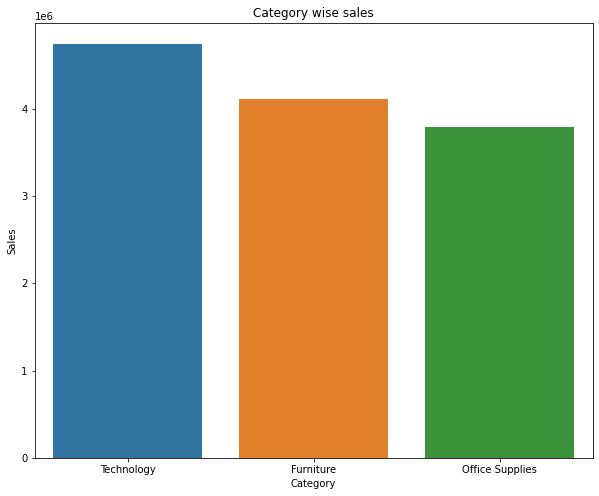

In [ ]:
#Category wise sales
plt.figure(figsize=(10,8))
result = data.groupby(["Category"])['Sales'].aggregate(np.sum).reset_index().sort_values('Sales',ascending = False).head(20)
result.head
type(result)
result.shape
result
plt.title('Category wise sales')
sns.barplot(x = "Category",y= "Sales",data=result)

In [ ]:
subcat_analysis = pd.DataFrame(data.groupby(['Category'])[['Sales']].sum())

In [ ]:

subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales
Category,
Technology,4.744557e+06
Furniture,4.110874e+06
Office Supplies,3.787070e+06


**RESULT : Technology has the highest sales, followed by furniture category and office supplies.**

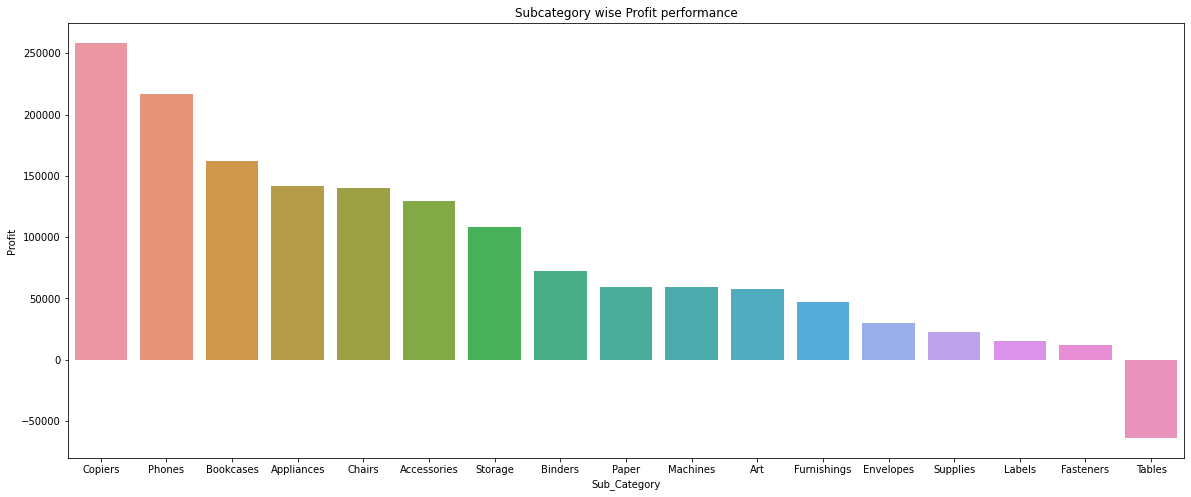

In [ ]:
#Subcategory wise Profit
plt.figure(figsize=(20,8))
result = data.groupby(["Sub_Category"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)
result.head
type(result)
result.shape
result
plt.title('Subcategory wise Profit performance')
sns.barplot(x = "Sub_Category",y= "Profit",data=result)

In [ ]:
subcat_analysis = pd.DataFrame(data.groupby(['Sub_Category'])[['Profit']].sum())

In [ ]:

subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_sales

,Profit
Sub_Category,
Copiers,258567.54818
Phones,216717.00580
Bookcases,161924.41950
Appliances,141680.58940
Chairs,140396.26750
Accessories,129626.30620
Storage,108461.48980
Binders,72449.84600
Paper,59207.68270


**RESULT : Copiers have the highest profits. Fastners have the lowest profits. Tables have negative profits, ie, losses.**

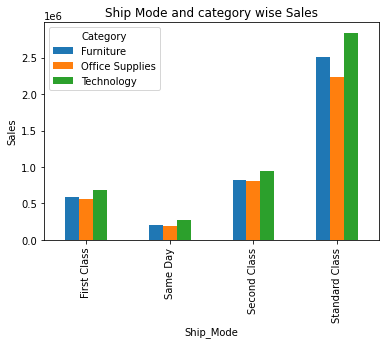

In [ ]:
ship_catsales = data[['Ship_Mode','Category', 'Sales']]
ship_catsales_pivot = pd.pivot_table(ship_catsales, 
                          values="Sales", 
                          index="Ship_Mode", 
                          columns="Category", 
                          aggfunc=np.sum)

ship_catsales_pivot.plot.bar()
plt.ylabel("Sales")
plt.title("Ship Mode and category wise Sales")
plt.show()

**RESULTS : Standard Class boosts the sales of Technology category Second Class boosts the sales of Technology category. First Class boosts the sales of Technology category. Same Day Class boosts the sales of Technology category.**